In [21]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10

%matplotlib notebook
%matplotlib inline

In [40]:
# dodam novo prvo vrstico za lažjo obravnavo:
# TO ZAŽENI SAMO 1x !!!!
with open('poganjanje-12-234.csv', 'r') as original: data = original.read()
with open('poganjanje-12-234.csv', 'w') as modified: modified.write("n,ime,i,j,c1,c2\n" + data)

In [60]:
# preberemo datoteko:
tabela = pd.read_csv(os.path.join('poganjanje-12-234.csv'))
# želeni stolpci so n in c1. Še prej tabelo razdelimo glede na i in j:
#           i je število gasilcev
#           j je število začetno pogorelih vozlišč

# tabele za obravnavo:
tabela_1_2 = (tabela.loc[(tabela['i'] == 1) & (tabela['j'] == 2)]).iloc[:, [0, 4]]
tabela_1_3 = (tabela.loc[(tabela['i'] == 1) & (tabela['j'] == 3)]).iloc[:, [0, 4]]
tabela_1_4 = (tabela.loc[(tabela['i'] == 1) & (tabela['j'] == 4)]).iloc[:, [0, 4]]
tabela_2_2 = (tabela.loc[(tabela['i'] == 2) & (tabela['j'] == 2)]).iloc[:, [0, 4]]
tabela_2_3 = (tabela.loc[(tabela['i'] == 2) & (tabela['j'] == 3)]).iloc[:, [0, 4]]
tabela_2_4 = (tabela.loc[(tabela['i'] == 2) & (tabela['j'] == 4)]).iloc[:, [0, 4]]

Text(0, 0.5, 'število potrebnih časovnih korakov')

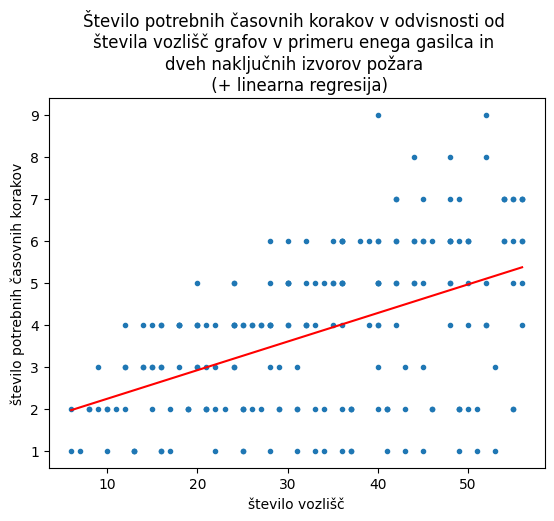

In [76]:
# za linearno regresijo:
from sklearn.linear_model import LinearRegression
# za sklearn v CMD: pip install -U scikit-learn scipy matplotlib
X = tabela_1_2.iloc[:, 0].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = tabela_1_2.iloc[:, 1].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plot_1_2 = tabela_1_2.plot(x = 'n', 
                           y = 'c1', 
                           style=['.', 'rx'], 
                           legend=False,
                           title='Število potrebnih časovnih korakov v odvisnosti od \nštevila vozlišč grafov v primeru enega gasilca in \ndveh naključnih izvorov požara \n (+ linearna regresija)')
plot_1_2.plot(X, 
              Y_pred, 
              color = 'red')
plot_1_2.set_xlabel("število vozlišč")
plot_1_2.set_ylabel("število potrebnih časovnih korakov")